# 11가지의 궁금증을 해소하는 입법 시각화

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import datetime as dt
import warnings 
warnings.filterwarnings(action='ignore')
from PIL import Image

In [3]:
os.getcwd()
os.chdir('C:\\Users\\user1\\Desktop\\데이콘\\입법_데이터_시각화\\Data')

In [4]:
people = pd.read_csv('new_people.csv',encoding='cp949')
suggest = pd.read_csv('suggest.csv')
process = pd.read_csv('process.csv')

In [5]:
plt.rcParams['font.family']='Malgun Gothic'

### 입법과정 한 눈에 보기

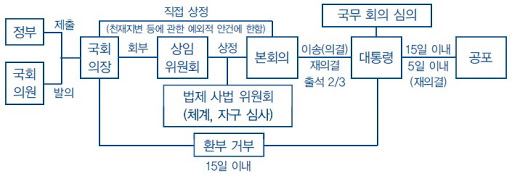

In [6]:
image = Image.open('입법과정.jpg')
image

## Q1. 대수별 국회의원 수는 어떻게 변화할까?

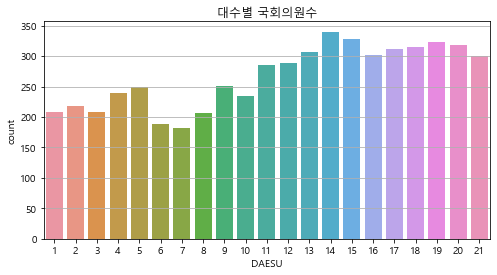

In [33]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.title('대수별 국회의원수')
sns.countplot(people['DAESU'])

### 대수가 지남에 따라 국회의원수 증가 !!
+ 7대에서 13대까지 **약 2배로 급격히 증가**합니다.
+ 13대 이후부터는 **약 300명대를 유지**합니다.

## Q2. 대수별 국회의원 출생지는 어떻게 다를까?

In [10]:
people['POSI_province'] = people['POSI'].apply(lambda x : np.nan if pd.isnull(x) else x.split()[0])
people['POSI_province'] = people['POSI_province'].replace({'경기도':'경기','충청북도':'충북','파주':'경기','경상남도':'경남',
                                                          '원주':'강원','강원도':'강원','포항':'경북','경기포천':'경기','부여':'충남',
                                                          '충청남도':'충남','대구광역시':'대구','전라북도':'전북','전남목포':'전남',
                                                          '광주광역시':'광주','경남고성':'경남','익산시':'전북','아산':'충남','대전시':'대전',
                                                          '남제주':'제주','울산시':'울산','경상북도':'경북','황해도':'황해','나주':'전남',
                                                          '부산광역시':'부산','평안남도':'평남','함경남도':'함남','제주도':'제주','논산':'충남',
                                                          '함경북도':'함북','선산':'경북','대전광역시':'대전','인천시':'인천','전라남도':'전남',
                                                          '전라도':'전라','서울시':'서울','광주시':'광주','서울특별시':'서울','전북부안':'전북',
                                                          '인천광역시':'인천','신안군':'전남','의왕':'경기','평안북도':'평북','대구시':'대구',
                                                          '광주시':'광주','울산광역시':'울산','전남도':'전남','대전직할시':'대전','부산시':'부산',
                                                          '서울종로':'서울','강워도':'강원','전남보성':'전남','평양시':'평양','전북고창':'전북',
                                                          '안동':'경북','마산':'경남','청주':'충북','전주':'전북','진주':'경남','합천':'경남',
                                                          '강릉':'강원'})
people['POSI_province'].unique()

array([nan, '강원', '서울', '광주', '경기', '울산', '충남', '전남', '경남', '충북', '대전',
       '전북', '부산', '경북', '제주', '대구', '인천', '일본', '필리핀', '평양', '해남', '평남',
       '함북', '황해', '평북', '중국', '만주', '함남', '전라', '개성'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

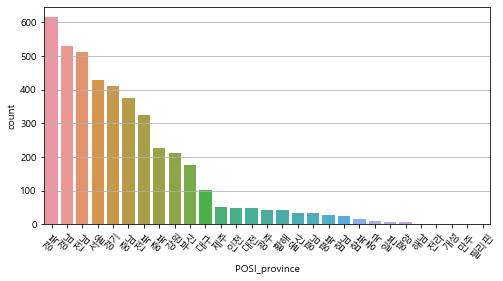

In [32]:
plt.figure(figsize=(8,4))
plt.grid(True)
sns.countplot(people['POSI_province'],order=people['POSI_province'].value_counts().index)
plt.xticks(rotation=50)

### 역대 국회의원 출신을 살펴보면 경상도가 제일 많음
+ 차례로 **1.경상도, 2.수도권, 3.충청도**순으로 역대 국회의원수가 많다.

## Q3. 대수별 발의법의안 건수는 상이할까?

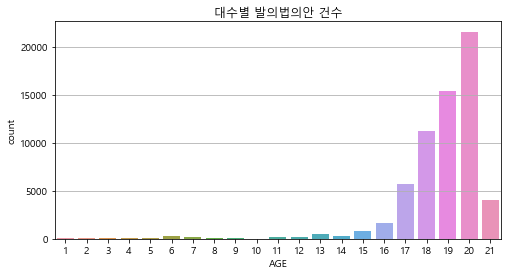

In [31]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.title('대수별 발의법의안 건수')
sns.countplot(suggest['AGE'])

### 16대 이후로 20대까지 발의법의안 건수가 급격히 증가
+ **21대 국회는 현재 진행중**이기 때문에 발의법의안 건수가 작음을 알 수 있다.

## Q4. 5년간 월별 발의법의안 건수는 어떨까?

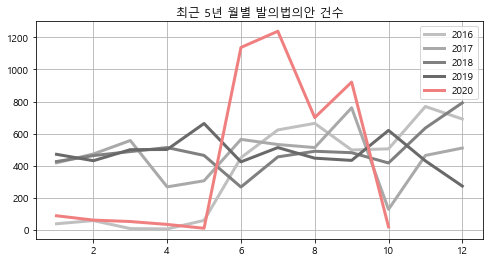

In [18]:
suggest['PROPOSE_DT'] = pd.to_datetime(suggest['PROPOSE_DT'])

mask = (suggest['PROPOSE_DT']>='2016-01-01')&(suggest['PROPOSE_DT']<'2021-01-01')
filtered_df = suggest.loc[mask]

filtered_df['PROPOSE_DT_YEAR'] = filtered_df['PROPOSE_DT'].dt.year
filtered_df['PROPOSE_DT_MONTH'] = filtered_df['PROPOSE_DT'].dt.month

filtered_16 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2016]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_17 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2017]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_18 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2018]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_19 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2019]['PROPOSE_DT_MONTH'].value_counts().sort_index()
filtered_20 = filtered_df[filtered_df['PROPOSE_DT_YEAR']==2020]['PROPOSE_DT_MONTH'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,4))
plt.title('최근 5년 월별 발의법의안 건수')
ax.plot(filtered_16,linewidth=3,color='silver', label='2016')
ax.plot(filtered_17,linewidth=3,color='darkgray',label='2017')
ax.plot(filtered_18,linewidth=3,color='gray',label='2018')
ax.plot(filtered_19,linewidth=3,color='dimgray',label='2019')
ax.plot(filtered_20,linewidth=3,color='lightcoral',label='2020')
plt.grid(True)
plt.legend()

### 2020년이 유독 눈에 띄는 그래프를 가짐
+ 특히 6월에 발의법의안 건수가 급격히 증가하고 7월에 1200건수를 넘으며 최고를 찍는다.
+ 20년은 아직 해가 끝나지않아 10월 이후의 자료는 없다.

## Q5. 대수별 발의법의안 처리상태는 어떻게 다를까?

+ 발의법의안 처리상태 종류 

  **1.** 대안반영폐기 **2.** 철회 **3.** 수정가결 **4.** 원안가결 
 **5.** 폐기 **6.** 임기만료폐기 **7.** 부결 **8.** 수정안반영폐기 
 **9.** 비상국무회의로이관 **10.** 회귀불계속폐기

In [19]:
grouped = suggest.groupby(['AGE','PROC_RESULT']).size().to_frame()
grouped = grouped.rename(columns={0:'count'})
grouped = grouped.dropna(axis=0)
grouped = grouped.reset_index()

grouped['cum_count']=grouped.groupby('AGE')['count'].cumsum(axis=0)
grouped['norm_count']=grouped.groupby('AGE')['count'].apply(lambda x : x/sum(x))
grouped['cum_norm_count']=grouped.groupby('AGE')['norm_count'].cumsum(axis=0)
grouped = grouped.sort_values(by=['cum_norm_count'],ascending=False)

Text(0.5, 1.0, '대수별 발의법의안 처리방법 비율')

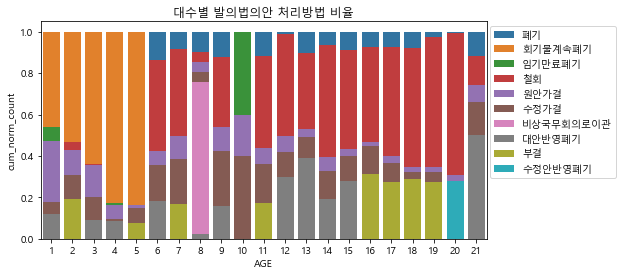

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x='AGE',y='cum_norm_count',hue='PROC_RESULT',data=grouped,dodge=False)
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1.0))
plt.title('대수별 발의법의안 처리방법 비율')

### 8대 국회는 박정희 대통령의 군사정권시대
+ 그렇기 때문에 **8대 국회는 해산**되고 대신해서 **비상국무회의에서 대부분의 안건을 처리**했다.


+ 대수가 지남에 따라 폐기,철회,부결의 비율이 점점↑ 가결률은 점점 ↓


### 비상국무회의 관련 위키피디아 설명(보안설명)

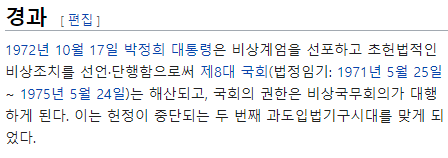

In [26]:
image1 = Image.open('8대국회.png')
image1

[참조] https://ko.wikipedia.org/wiki/%EB%B9%84%EC%83%81%EA%B5%AD%EB%AC%B4%ED%9A%8C%EC%9D%98

### 번외 : 대수별 발의법의안 가결률과 폐기율은 어떨지 따로 시각화해보면 어떨까?

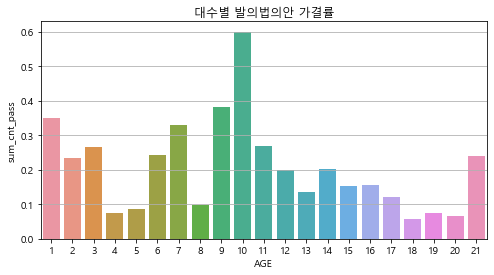

In [34]:
mask1 = (grouped['PROC_RESULT']=='원안가결')|(grouped['PROC_RESULT']=='수정가결')
grouped_mask1 = grouped.loc[mask1]

grouped_pass = grouped_mask1[['AGE','norm_count']]
grouped_sum = grouped_pass.groupby('AGE')['norm_count'].sum().to_frame()
grouped_sum = pd.DataFrame({'sum_cnt_pass':grouped_sum['norm_count']})
grouped_sum = grouped_sum.reset_index()

plt.figure(figsize=(8,4))
plt.grid(True)
plt.title('대수별 발의법의안 가결률')
sns.barplot(x='AGE',y='sum_cnt_pass',data=grouped_sum)

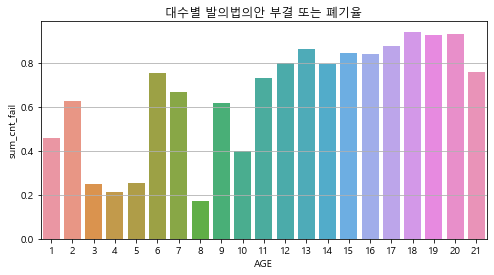

In [35]:
mask2 = (grouped['PROC_RESULT']=='대안반영폐기')|(grouped['PROC_RESULT']=='임기만료폐기')|(grouped['PROC_RESULT']=='폐기')|(grouped['PROC_RESULT']=='회기물계속폐기')|(grouped['PROC_RESULT']=='부결')|(grouped['PROC_RESULT']=='철회')|(grouped['PROC_RESULT']=='수정안반영폐기')
grouped_mask2 = grouped.loc[mask2]

grouped_fail = grouped_mask2[['AGE','norm_count']]
grouped_sum = grouped_fail.groupby('AGE')['norm_count'].sum().to_frame()
grouped_sum = pd.DataFrame({'sum_cnt_fail':grouped_sum['norm_count']})
grouped_sum = grouped_sum.reset_index()

plt.figure(figsize=(8,4))
plt.grid(True)
plt.title('대수별 발의법의안 부결 또는 폐기율')
sns.barplot(x='AGE',y='sum_cnt_fail',data=grouped_sum)

+ 가결률은 시간이 흐르면서 점점 떨어지고 폐기 (또는 부결)률은 점점 증가함을 알 수 있다.
+ 최근 **3대수 (18~20대)**를 보면 가결률은 역대 **최저 0.1이하** 폐기(또는 부결)률은 **최고 0.9이상** 이다.

## Q6. 발의법의안을 가장 많이 제시한 국회의원은 누구일까?

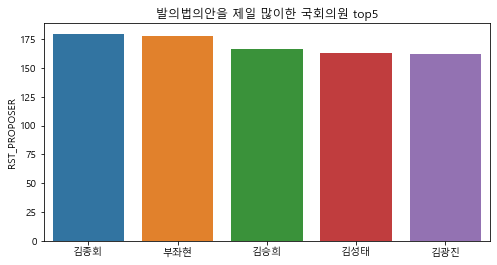

In [60]:
top5 = suggest['RST_PROPOSER'].value_counts()[:5]

plt.figure(figsize=(8,4))
plt.title('발의법의안을 제일 많이한 국회의원 top5')
sns.barplot(x=top5.index,y=top5)

+ 여기서 이 5명이 top5로 나온 것은 **연임**을 했기 때문입니다.  
    1. 이명수 : 18,19,20,21대 국회의원 당선
    2. 황주홍 : 19,20대 국회의원 당선
    3. 강창일 : 17,18,19,20대 국회의원 당선
    4. 오제세 : 17,18,19,20대 국회의원 당선
    5. 김우남 : 17,18,19대 국회의원 당선
    
    
    
+ 실제 발의안을 많이 냈을 수 있지만 연임의 힘이 큰 것으로 사료된 **연임하지 않은 국회의원 중엔 누가 가장 발의안을 많이 냈는지** 살표보겠습니다. 

### 번외 : 연임하지 않은 국회의원 중에 발의안을 가장 많이 낸 사람은 누구일까? 

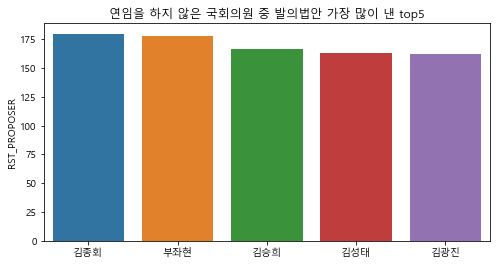

In [44]:
dropped_ppl = people.drop_duplicates(['NAME','NAME_HAN','BIRTH','BON'],keep=False)

name_list = dropped_ppl['NAME'].to_list()
suggest_copy = suggest
suggest_copy['RST_PROPOSER'] = suggest_copy['RST_PROPOSER'].apply(lambda x : x if x in name_list else np.nan)
suggest_copy = suggest_copy[(suggest_copy['RST_PROPOSER']!='np.nan') & (suggest_copy['RST_PROPOSER']!='nan')]
                            
plt.figure(figsize=(8,4))
dropped_top5 = suggest_copy['RST_PROPOSER'].value_counts()[:5]
plt.title('연임을 하지 않은 국회의원 중 발의법안 가장 많이 낸 top5')
sns.barplot(x=dropped_top5.index,y=dropped_top5)

In [59]:
dropped_ppl[dropped_ppl['NAME']=='부좌현']

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,POSI_province
750,19,제19대국회의원(경기 안산시단원구을) 정당_45,19대의원,부좌현,夫佐炫,NaN,NaN,1956년 05월 13일,NaN,NaN,한국방송통신대학교 법학 학사 \r\n한양대학교 행정자치대학원 행정학 석사 \r\n\...,NaN,새로운희망 함께 꿈꾸는 세상,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,NaN


+ 해당임기동안 성실히 발의법의안을 가장 많이 낸 국회의원은 **김종회, 부좌현, 김승희, 김성태, 김광진 국회의원**이다.   

+ **모두 19대 또는 20대 의원**이라는 것으로 보아 최근들어 발의안 건수가 늘고 있다는 사실 또한 보여준다.

## Q7. 최근 5개 대수별 어떤 종류의 법률안이 안건이 되었을까?

In [61]:
suggest_copy = suggest

suggest_copy['BILL_NAME'] = suggest_copy['BILL_NAME'].apply(lambda x : x.split()) 
suggest_copy['BILL_NAME'] = suggest_copy['BILL_NAME'].apply(lambda x : x[0]) 

suggest_copy = suggest_copy.groupby(['AGE','BILL_NAME']).size().to_frame()
suggest_copy = suggest_copy.reset_index()
suggest_copy = suggest_copy.rename(columns={0:'count'})

def top_5(suggest_copy,n=5,column='count'):
    return suggest_copy.sort_values(by='count',ascending=False)[:n]

grouped_top5 = suggest_copy.groupby('AGE').apply(top_5,column='count',n=5)

grouped_17 = grouped_top5[grouped_top5['AGE']==17]
grouped_18 = grouped_top5[grouped_top5['AGE']==18]
grouped_19 = grouped_top5[grouped_top5['AGE']==19]
grouped_20 = grouped_top5[grouped_top5['AGE']==20]
grouped_21 = grouped_top5[grouped_top5['AGE']==21]

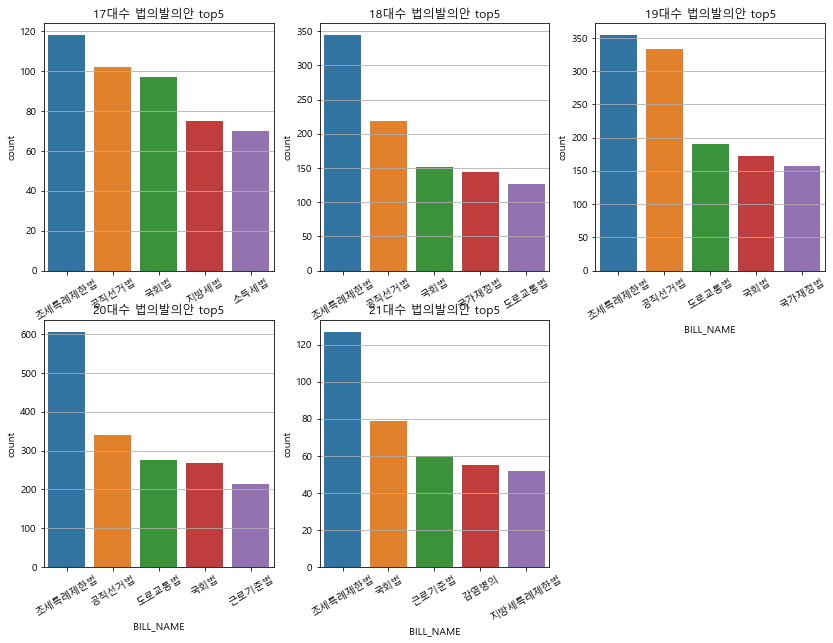

In [82]:
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(2,3,1) 
plt.title('17대수 법의발의안 top5')
plt.grid(True)
plt.xticks(rotation=30)
ax2 = fig.add_subplot(2,3,2)
plt.title('18대수 법의발의안 top5')
plt.grid(True)
plt.xticks(rotation=30)
ax3 = fig.add_subplot(2,3,3)
plt.title('19대수 법의발의안 top5')
plt.grid(True)
plt.xticks(rotation=30)
ax4 = fig.add_subplot(2,3,4) 
plt.title('20대수 법의발의안 top5')
plt.grid(True)
plt.xticks(rotation=30)
ax5 = fig.add_subplot(2,3,5)
plt.title('21대수 법의발의안 top5')
plt.grid(True)
plt.xticks(rotation=30)


sns.barplot(x=grouped_17['BILL_NAME'],y=grouped_17['count'],ax=ax1)
sns.barplot(x=grouped_18['BILL_NAME'],y=grouped_18['count'],ax=ax2)
sns.barplot(x=grouped_19['BILL_NAME'],y=grouped_19['count'],ax=ax3)
sns.barplot(x=grouped_20['BILL_NAME'],y=grouped_20['count'],ax=ax4)
sns.barplot(x=grouped_21['BILL_NAME'],y=grouped_21['count'],ax=ax5)

### 도로교통법, 근로기준법, 감염병관련법이 최근 5개 대수에서 발의안건수가 제일 눈에 띔 
+ 가장 많은 발의안건을 하는 법은 **조세특례제한법, 공직선거법, 국회법**이 대표적이다.
+ **도로교통법**은 **18대에서 20대까지 5위에서 3위**를 차지하면서 안건수가 상승하였다.
+ **근로기준법** 또한 **20대에서 21대로 2단계 상승**하면서 순위가 올랐다.
+ 최근 **코로나**로 21대 국회에서는 기존에 top5에 없었던 **감염병관련 법안이 4위로 올라왔음**을 볼 수 있다.

## Q8. 대수별 본회의 처리안 건수는 어떻게 달라질까?

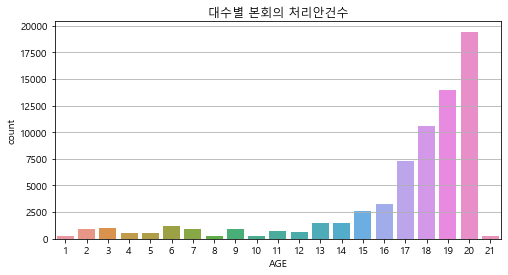

In [83]:
plt.figure(figsize=(8,4))
plt.title('대수별 본회의 처리안건수')
plt.grid(True)
sns.countplot(process['AGE'])

### 대수가 증가하면서 본회의 처리안건수 또한 발의안건수처럼 기하급수적으로 상승함

## Q9. 대수별 총득표수 찬성, 반대, 기권 비율은 어떻게 될까?

In [6]:
vote_cnt = process[['AGE','VOTE_TCNT','YES_TCNT','NO_TCNT','BLANK_TCNT']]

vote_cnt['yes_ratio'] = vote_cnt['YES_TCNT']/vote_cnt['VOTE_TCNT']
vote_cnt['no_ratio'] = vote_cnt['NO_TCNT']/vote_cnt['VOTE_TCNT']
vote_cnt['blank_ratio'] = vote_cnt['BLANK_TCNT']/vote_cnt['VOTE_TCNT']

vote_cnt['yes_ratio'] = vote_cnt['yes_ratio'].apply(lambda x : x if x >=0 else 0)
vote_cnt['no_ratio'] = vote_cnt['no_ratio'].apply(lambda x : x if x >=0 else 0)
vote_cnt['blank_ratio'] = vote_cnt['blank_ratio'].apply(lambda x : x if x >=0 else 0)

mean_yes_ratio = vote_cnt['yes_ratio'].groupby(vote_cnt['AGE']).mean()
mean_no_ratio = vote_cnt['no_ratio'].groupby(vote_cnt['AGE']).mean()
mean_blank_ratio = vote_cnt['blank_ratio'].groupby(vote_cnt['AGE']).mean()

mean_ratio = pd.DataFrame({'age': mean_yes_ratio.index,
                          'mean_yes_ratio': mean_yes_ratio,
                          'mean_no_ratio': mean_no_ratio,
                          'mean_blank_ratio': mean_blank_ratio})
mean_ratio.reset_index(inplace=True)
mean_ratio.drop('AGE',axis=1,inplace=True)
mean_ratio

,age,mean_yes_ratio,mean_no_ratio,mean_blank_ratio
0,1,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000
4,5,0.000000,0.000000,0.000000
5,6,0.000000,0.000000,0.000000
6,7,0.000000,0.000000,0.000000
7,8,0.000000,0.000000,0.000000
8,9,0.000000,0.000000,0.000000
9,10,0.000000,0.000000,0.000000


+ 대수별 찬성, 반대, 기권수 비율을 평균을 구하였으나 20대, 21대 이외엔 투표자료가 없었다. 


**그래서 20대와 21대의 찬성,반대,기권비율의 평균을 비교하겠습니다.**

In [7]:
mean_ratio = mean_ratio[-2:]
mean_ratio_20 = mean_ratio.iloc[[0],1:4]
mean_ratio_21 = mean_ratio.iloc[[1],1:4]

mean_ratio_20.round(2)
mean_ratio_21.round(2)

df_cnt_ratio = pd.DataFrame({'age':[20,20,20,21,21,21],
                            'kind':['yes','no','blank','yes','no','blank'],
                            'mean_ratio': [0.18,0,0,0.62,0.01,0.02]})
df_cnt_ratio

,age,kind,mean_ratio
0,20,yes,0.18
1,20,no,0.00
2,20,blank,0.00
3,21,yes,0.62
4,21,no,0.01
5,21,blank,0.02


Text(0.5, 1, '20대,21대 찬성,반대,기권 투표비율의 평균 비교')

<Figure size 432x288 with 0 Axes>

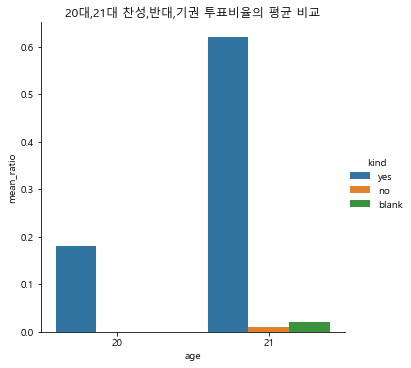

In [15]:
plt.figure(figsize=(6,4))
sns.catplot(x="age", y="mean_ratio", hue="kind",
                capsize=.2, kind="bar", data=df_cnt_ratio)
plt.title('20대,21대 찬성,반대,기권 투표비율의 평균 비교')

+ 20대보다 3배 많은 21대에서 **평균적으로 60%**찬성률을 보인다.
+ 하지만 두개의 대수의 자료이므로 결측치가 많아 정확한 지표로 쓰이긴 힘들 것 같다.

## Q10. 대수별 안건을 제안하고 공포하기까지 걸리는 시간은 얼마일까?

In [17]:
process_copy = process[['PROPOSE_DT','ANNOUNCE_DT','AGE']]

process_notnull = process_copy[process_copy['ANNOUNCE_DT'].notnull()]
process_notnull.reset_index(inplace=True)
process_notnull.drop('index',axis=1,inplace=True)

process_notnull['PROPOSE_DT'] = pd.to_datetime(process_notnull['PROPOSE_DT'])
process_notnull['ANNOUNCE_DT'] = pd.to_datetime(process_notnull['ANNOUNCE_DT'],errors = 'coerce') # Out of Boundary Error

process_notnull['diff_dt'] = process_notnull['ANNOUNCE_DT'] - process_notnull['PROPOSE_DT']
process_notnull = process_notnull[process_notnull['PROPOSE_DT'] <= process_notnull['ANNOUNCE_DT']] # 제안일이 공포일보다 전에 일어난 경우만

process_notnull['diff_dt'] = process_notnull['diff_dt'].astype('str')
process_notnull['diff_dt'] = process_notnull['diff_dt'].apply(lambda x : re.findall('\d+',x)[0])
process_notnull.head(3)

,PROPOSE_DT,ANNOUNCE_DT,AGE,diff_dt
0,2020-08-03,2020-08-18,21,15
1,2020-08-03,2020-08-18,21,15
2,2020-08-03,2020-08-18,21,15


In [18]:
process_notnull['diff_dt'] = process_notnull['diff_dt'].astype('int')
mean_diff_dt = process_notnull.groupby('AGE')['diff_dt'].mean()
mean_diff_dt = mean_diff_dt.to_frame()
mean_diff_dt.reset_index(inplace=True)
mean_diff_dt.head(3)

,AGE,diff_dt
0,1,124.829630
1,2,105.817204
2,3,165.642857


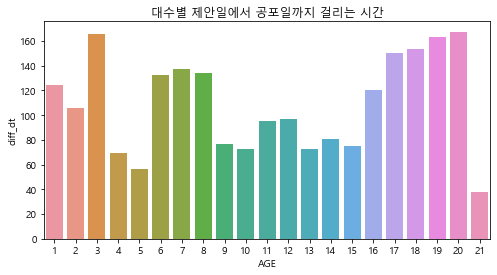

In [19]:
plt.figure(figsize=(8,4))
plt.title('대수별 제안일에서 공포일까지 걸리는 시간')
sns.barplot(x=mean_diff_dt['AGE'],y=mean_diff_dt['diff_dt'])

+ 모든 대수의 **평균 소요일은 약 80일**이나 최근 4개,17-20대수는 평균적으로 제안에서 공포되기까지 걸리는 시간이 **150일 즉, 4-5개월**이 걸린다는 것을 알 수 있다.

## Q11. 제안일과 공포일의 월별, 요일별 분포는 어떻게 될까?

In [20]:
process_dt = process

process_dt['PROPOSE_DT'] = pd.to_datetime(process_dt['PROPOSE_DT'])
process_dt['ANNOUNCE_DT'] = pd.to_datetime(process_dt['ANNOUNCE_DT'],errors = 'coerce') # Out of Boundary Error

process_dt['propose_month'] = process_dt['PROPOSE_DT'].dt.month
process_dt['announce_month'] = process_dt['ANNOUNCE_DT'].dt.month
process_dt['propose_weekday'] = process_dt['PROPOSE_DT'].dt.weekday # weekday (0:월 1:화 2:수 3:목 4:금 5:토 6:일)
process_dt['announce_weekday'] = process_dt['ANNOUNCE_DT'].dt.weekday

process_dt = process_dt[['propose_month','announce_month','propose_weekday','announce_weekday']]
process_dt['announce_month'] = pd.to_numeric(process_dt['announce_month'],downcast='integer',errors='coerce')

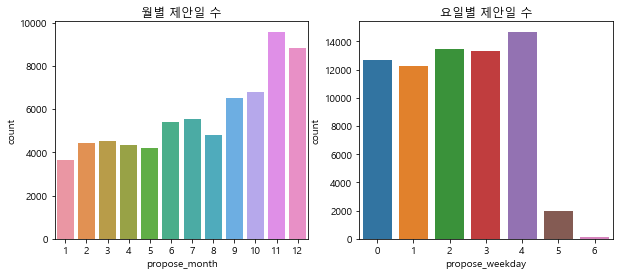

In [24]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
plt.title('월별 제안일 수')
ax2 = fig.add_subplot(1,2,2)
plt.title('요일별 제안일 수')
sns.countplot(process_dt['propose_month'],ax=ax1)
sns.countplot(process_dt['propose_weekday'],ax=ax2)

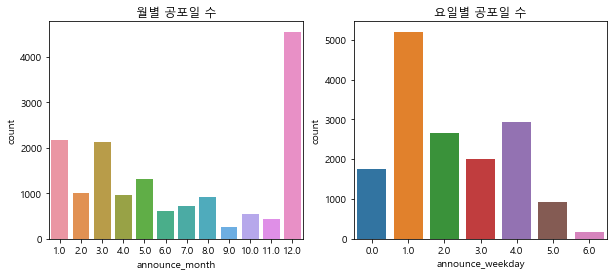

In [25]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
plt.title('월별 공포일 수')
ax2 = fig.add_subplot(1,2,2)
plt.title('요일별 공포일 수')
sns.countplot(process_dt['announce_month'],ax=ax1)
sns.countplot(process_dt['announce_weekday'],ax=ax2)

* **제안일** 기준
    + 연말로 갈수록 제안건수가 많아지며 **11월 12월이 최대**임을 알 수있다. 
    + 요일별 제안건수는 평일 월~금 모두 비슷하고 주말은 확연히 적다.

* **공포일** 기준
    - **12월달**에 공포를 제일 많이 하고 연초에 조금 많다는 것을 볼 수 있다. 
    - 요일별로는 **화요일**이 압도적으로 많이 공포되는 요일이다. 